In [1]:
import numpy as np
import pandas as pd
import os
import cv2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, mean_absolute_percentage_error,
    explained_variance_score, r2_score, accuracy_score, confusion_matrix
)


In [2]:
def load_images(folder_path, label, image_size=64):
    images = []
    labels = []
    for file_name in os.listdir(folder_path):
        if file_name.endswith(".jpg"):
            image_path = os.path.join(folder_path, file_name)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            if image is not None:
                image_resized = cv2.resize(image, (image_size, image_size))
                images.append(image_resized.flatten())  # Flatten the image
                labels.append(label)
    return np.array(images), np.array(labels)

# Load healthy and unhealthy images
healthy_images, healthy_labels = load_images('D:/AI Algorithm/cucumber/healthy/', 0)
unhealthy_images, unhealthy_labels = load_images('D:/AI Algorithm/cucumber/unhealthy/', 1)

# Combine images and labels
X = np.concatenate((healthy_images, unhealthy_images), axis=0)
y = np.concatenate((healthy_labels, unhealthy_labels), axis=0)


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
# Initialize and train the Bagging Regressor
bagging_model = BaggingRegressor(
    estimator=DecisionTreeRegressor(),  # Use 'estimator' instead of 'base_estimator'
    n_estimators=10,
    random_state=42
)
bagging_model.fit(X_train, y_train)


BaggingRegressor(estimator=DecisionTreeRegressor(), random_state=42)

In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
import numpy as np

# Predict the target for the test set
y_pred = bagging_model.predict(X_test)

# Convert predictions to binary (0 or 1) for classification metrics
y_pred_class = np.round(y_pred)

# Calculate accuracy, precision, recall, F1-score, and AUC
accuracy = accuracy_score(y_test, y_pred_class)
precision = precision_score(y_test, y_pred_class)
recall = recall_score(y_test, y_pred_class)
f1 = f1_score(y_test, y_pred_class)
auc = roc_auc_score(y_test, y_pred_class)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_class)

# Calculate regression metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100  # Multiply by 100 to get percentage

epsilon = 1e-10  # Small constant to prevent division by zero
smape = 100 * np.mean(2 * np.abs(y_pred - y_test) / (np.abs(y_pred) + np.abs(y_test) + epsilon))

#smape = 100 * np.mean(2 * np.abs(y_pred - y_test) / (np.abs(y_pred) + np.abs(y_test)))

# Other evaluation metrics
explained_variance = explained_variance_score(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mbd = np.mean(y_pred - y_test)  # Mean Bias Deviation (MBD)

# Print all the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"AUC: {auc:.2f}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}")
print(f"Systematic Mean Absolute Percentage Error (SMAPE): {smape:.2f}")
print(f"Explained Variance Score: {explained_variance:.2f}")
print(f"R^2 Score: {r2:.2f}")
print(f"Mean Bias Deviation (MBD): {mbd:.2f}")


Accuracy: 0.81
Precision: 0.81
Recall: 0.94
F1-Score: 0.87
AUC: 0.72
Confusion Matrix:
[[ 35  35]
 [ 10 151]]
Mean Absolute Error (MAE): 0.26
Mean Squared Error (MSE): 0.13
Root Mean Squared Error (RMSE): 0.36
Mean Absolute Percentage Error (MAPE): 63947215488204464.00
Systematic Mean Absolute Percentage Error (SMAPE): 71.88
Explained Variance Score: 0.39
R^2 Score: 0.39
Mean Bias Deviation (MBD): 0.02


In [9]:
import joblib

# Save the model
joblib.dump(bagging_model, 'bagging_leaf_health_model.pkl')
print("Bagging Regressor model saved as 'bagging_leaf_health_model.pkl'")


Bagging Regressor model saved as 'bagging_leaf_health_model.pkl'


In [10]:
def predict_leaf_health_bagging(image_path):
    # Load the saved model
    loaded_bagging_model = joblib.load('bagging_leaf_health_model.pkl')
    
    # Load and preprocess the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise ValueError("Image not found or invalid format.")
    image_resized = cv2.resize(image, (64, 64))
    image_flattened = image_resized.flatten().reshape(1, -1)
    
    # Predict using the model
    prediction = loaded_bagging_model.predict(image_flattened)
    return "Healthy" if prediction[0] < 0.5 else "Unhealthy"

# Example usage
new_image_path = 'D:/AI Algorithm/cucumber/test_image.jpg'  # Replace with a new image path
result = predict_leaf_health_bagging(new_image_path)
print(f"The leaf is: {result}")


The leaf is: Healthy


In [12]:
import matplotlib.pyplot as plt


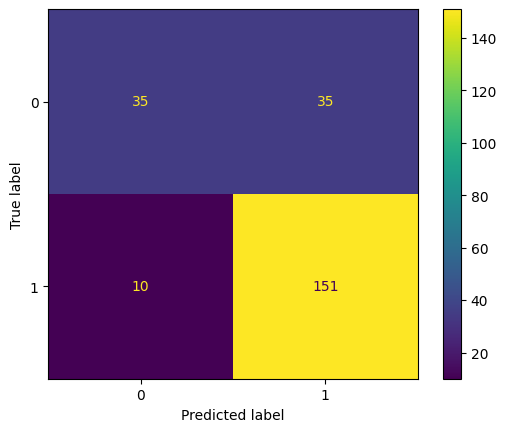

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt  # Ensure this import is included

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_rounded)

# Display confusion matrix
ConfusionMatrixDisplay(confusion_matrix=conf_matrix).plot()

# Show the plot
plt.show()
